# Comparison with Other Methods

In [1]:
% Add path to data and solver
addpath(genpath('PROSTATE'))
addpath(genpath('minConf'))

### Set up various body structures and constraints

In [13]:
% Prostate
prostate.name = 'PTV_68';
pt1.type = 'unif'; pt1.dose = 81; pt1.weight = 1;
pt2.type = 'ldvc'; pt2.dose = 81; pt2.percent = 95; pt2.weight = 1;
pt3.type ='udvc'; pt3.dose = 1.12*81; pt3.percent = 0; pt3.weight = 1;

% Lymph nodes
nodes.name = 'PTV_56';
nt1.type = 'unif'; nt1.dose = 60; nt1.weight = 1;
nt2.type = 'ldvc'; nt2.dose = 60; nt2.percent = 95; nt2.weight = 1;
nt3.type = 'udvc'; nt3.dose = 1.12*60; nt3.percent = 0; nt3.weight = 1;

% Rectum
rectum.name = 'Rectum';
rt1.type = 'udvc'; rt1.dose = 50; rt1.percent = 50; rt1.weight = 1;
rt2.type = 'udvc'; rt2.dose = 30; rt2.percent = 30; rt2.weight = 1;
rt3.type = 'udvc'; rt3.dose = 10; rt3.percent = 10; rt3.weight = 1;
rt4.type = 'udvc'; rt4.dose = 75; rt4.percent = 0; rt4.weight = 1;
rt5.type = 'udvc'; rt5.dose = 60; rt5.percent = 20; rt5.weight = 1;
rt6.type = 'udvc'; rt6.dose = 20; rt6.percent = 60; rt6.weight = 1;

% Bladder
bladder.name = 'Bladder';
bt1.type = 'udvc'; bt1.dose = 30; bt1.percent = 30; bt1.weight = 1;

# Example 4.1(a)

### Timing
* Our Method: 22.87 seconds
* Our Method (hc): 5.29 seconds
* Constraint Generation: 5.15 seconds
* Convex Relaxation: 97.25 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | 54.69
Our Method (hc) | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Constraint Generation | 75.83 | 80.88 | 80.96 | 79.64 | 83.55 | 0.66 | 55.48
Convex Relaxation | 73.95 | 80.86 | 80.95 | 79.27 | 83.49 | 0.87 | 72.64

### OAR
* No more than 50% of rectum volume may exceed 50 Gy

Method | % OAR > 50 | Area
-|-|-
Initialization | 56.80 | 4333.84
Our Method | 51.52 | 4218.74
Our Method (hc) | 50.00 | 4190.45
Constraint Generation | 49.51 | 4155.44
Convex Relaxation | 33.80 | 3715.46

## Initialization

In [15]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};

% Create problem instance
f1 = FluenceMapOpt(structs,'tol',5e-5);
printStats(f1,f1.x0);

Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84


## Our Method

In [16]:
tic;
f1.calcBeamlets(false); 
t = toc;
x1a = f1.x;
fprintf('Time: %.2f\n',t)
printStats(f1,x1a)

Time: 22.87
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | 54.69
Structure: Rectum
* udvc | 51.52 | 4218.74


## Our Method (hard constraints)

In [17]:
tic;
f1.constGen(x1a);
t = toc;
x1b = f1.x;
fprintf('Time: %.2f\n',t)
printStats(f1,x1b)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 5.29
Structure: PTV_68
* unif | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Structure: Rectum
* udvc | 50.00 | 4190.45


## Constraint Generation

In [18]:
tic;
f1.constGen();
t = toc;
x1c = f1.x;
fprintf('Time: %.2f\n',t)
printStats(f1,x1c)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 5.15
Structure: PTV_68
* unif | 75.83 | 80.88 | 80.96 | 79.64 | 83.55 | 0.66 | 55.48
Structure: Rectum
* udvc | 49.51 | 4155.44


## Convex Relaxation

In [19]:
tic;
f1.convRelax();
t = toc;
x1d = f1.x;
fprintf('Time: %.2f\n',t)
printStats(f1,x1d)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 97.25
Structure: PTV_68
* unif | 73.95 | 80.86 | 80.95 | 79.27 | 83.49 | 0.87 | 72.64
Structure: Rectum
* udvc | 33.80 | 3715.46


## Results

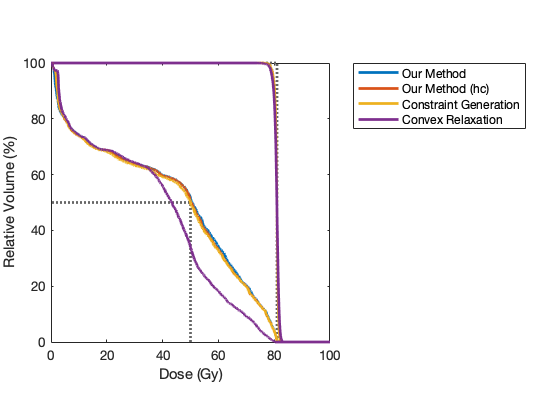

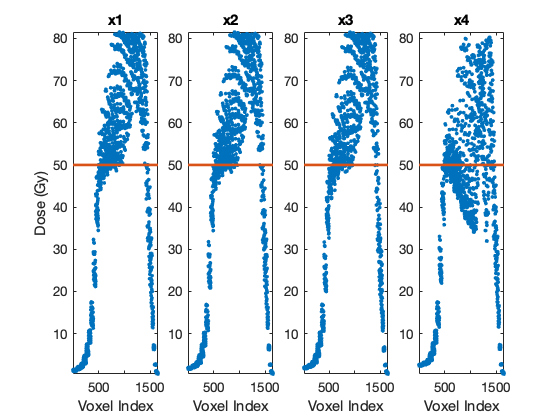

In [67]:
f1.compareVoxelDose(2,[x1a,x1b,x1c,x1d])
f1.compareDVH([x1a,x1b,x1c,x1d],{'Our Method','Our Method (hc)','Constraint Generation','Convex Relaxation'})

# Example 4.1(b)

### Timing
* Our Method: 52.41 seconds
* Our Method (hc): 7.99 seconds
* Constraint Generation: 8.65 seconds
* Convex Relaxation: 108.39 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.20
Our Method (hc) | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Constraint Generation | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Convex Relaxation | 53.43 | 80.64 | 80.87 | 76.93 | 94.70 | 3.06 | 253.70

### OAR
* No more than 30% of rectum volume may exceed 30 Gy

Method | % OAR > 30 | Area
-|-|-
Initialization | 64.14 | 4333.84
Our Method | 33.37 | 2789.26
Our Method (hc) | 29.98 | 2624.35
Constraint Generation | 28.82 | 2497.81
Convex Relaxation | 21.78 | 2002.42

## Initialization

In [32]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};

% Create problem instance
f2 = FluenceMapOpt(structs,'tol',5e-5);
printStats(f2,f2.x0);

Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 64.14 | 4333.84


## Our Method

In [33]:
tic;
f2.calcBeamlets(false); 
t = toc;
x2a = f2.x;
fprintf('Time: %.2f\n',t)
printStats(f2,x2a)

Time: 52.41
Structure: PTV_68
* unif | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.20
Structure: Rectum
* udvc | 33.37 | 2789.26


## Our Method (hard constraints)

In [34]:
tic;
f2.constGen(x2a);
t = toc;
x2b = f2.x;
fprintf('Time: %.2f\n',t)
printStats(f2,x2b)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 7.99
Structure: PTV_68
* unif | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Structure: Rectum
* udvc | 29.98 | 2624.35


## Constraint Generation

In [35]:
tic;
f2.constGen();
t = toc;
x2c = f2.x;
fprintf('Time: %.2f\n',t)
printStats(f2,x2c)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 8.65
Structure: PTV_68
* unif | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Structure: Rectum
* udvc | 28.82 | 2497.81


## Convex Relaxation

In [36]:
tic;
f2.convRelax();
t = toc;
x2d = f2.x;
fprintf('Time: %.2f\n',t)
printStats(f2,x2d)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 108.39
Structure: PTV_68
* unif | 53.43 | 80.64 | 80.87 | 76.93 | 94.70 | 3.06 | 253.70
Structure: Rectum
* udvc | 21.78 | 2002.42


## Results

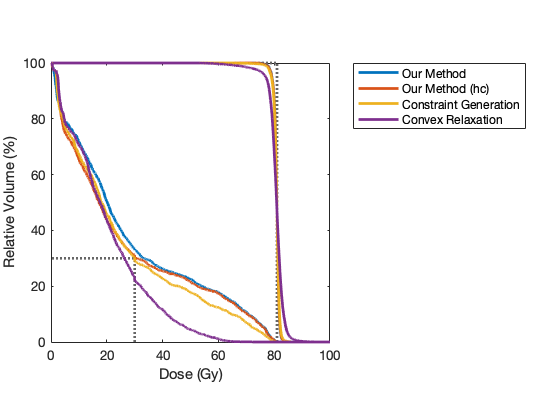

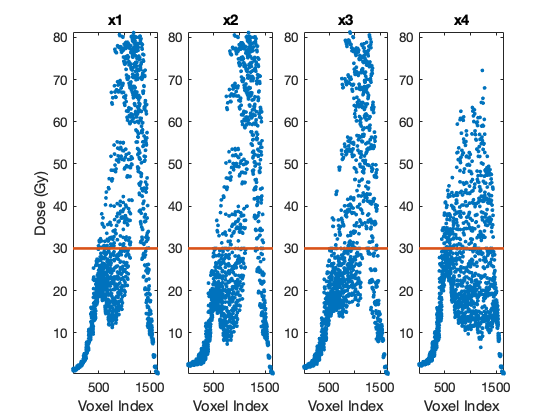

In [66]:
f2.compareVoxelDose(2,[x2a,x2b,x2c,x2d])
f2.compareDVH([x2a,x2b,x2c,x2d],{'Our Method','Our Method (hc)','Constraint Generation','Convex Relaxation'})

# Example 4.1(c)

### Timing
* Our Method: 34.08 seconds
* Our Method (hc): 10.41 seconds
* Constraint Generation: 10.84 seconds
* Convex Relaxation: 112.51 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | 358.11
Our Method (hc) | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Constraint Generation | 16.18 | 78.81 | 80.51 | 58.62 | 103.13 | 10.14 | 853.41
Convex Relaxation | 12.89 | 78.77 | 80.49 | 59.96 | 100.68 | 10.20 | 858.59

### OAR
* No more than 10% of rectum volume may exceed 10 Gy

Method | % OAR > 10 | Area
-|-|-
Initialization | 73.97 | 4333.84
Our Method | 23.85 | 941.30
Our Method (hc) | 8.19 | 471.89
Constraint Generation | 7.46 | 465.74
Convex Relaxation | 7.83 | 511.64

## Initialization

In [42]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};

% Create problem instance
f3 = FluenceMapOpt(structs,'tol',5e-5);
printStats(f3,f3.x0);

Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 73.97 | 4333.84


## Our Method

In [43]:
tic;
f3.calcBeamlets(false); 
t = toc;
x3a = f3.x;
fprintf('Time: %.2f\n',t)
printStats(f3,x3a)

Time: 34.08
Structure: PTV_68
* unif | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | 358.11
Structure: Rectum
* udvc | 23.85 | 941.30


## Our Method (hard constraints)

In [44]:
tic;
f3.constGen(x3a);
t = toc;
x3b = f3.x;
fprintf('Time: %.2f\n',t)
printStats(f3,x3b)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 10.41
Structure: PTV_68
* unif | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Structure: Rectum
* udvc | 8.19 | 471.89


## Constraint Generation

In [45]:
tic;
f3.constGen();
t = toc;
x3c = f3.x;
fprintf('Time: %.2f\n',t)
printStats(f3,x3c)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 10.84
Structure: PTV_68
* unif | 16.18 | 78.81 | 80.51 | 58.62 | 103.13 | 10.14 | 853.41
Structure: Rectum
* udvc | 7.46 | 465.74


## Convex Relaxation

In [46]:
tic;
f3.convRelax();
t = toc;
x3d = f3.x;
fprintf('Time: %.2f\n',t)
printStats(f3,x3d)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 112.51
Structure: PTV_68
* unif | 12.89 | 78.77 | 80.49 | 59.96 | 100.68 | 10.20 | 858.59
Structure: Rectum
* udvc | 7.83 | 511.64


## Results

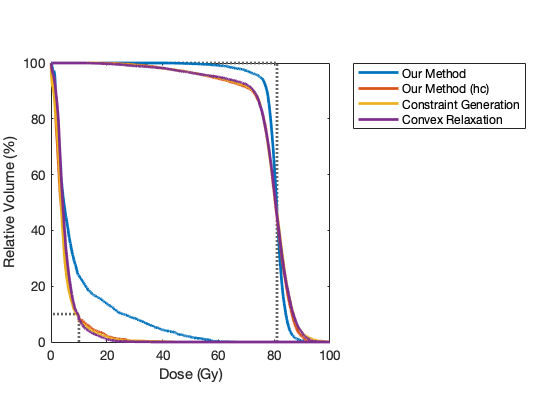

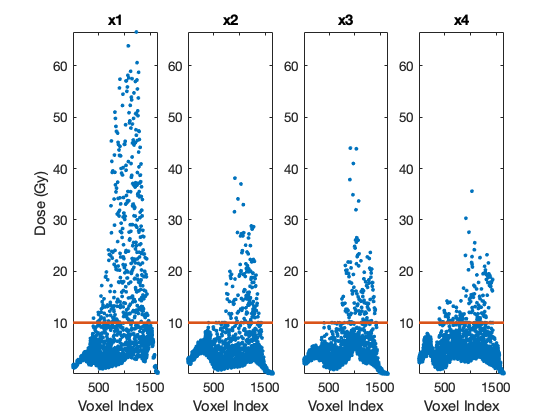

In [65]:
f3.compareVoxelDose(2,[x3a,x3b,x3c,x3d])
f3.compareDVH([x3a,x3b,x3c,x3d],{'Our Method','Our Method (hc)','Constraint Generation','Convex Relaxation'})

# Example 4.2

### Timing
* Our Method: 102.81 seconds
* Our Method (hc): 30.23 seconds
* Constraint Generation: 30.70 seconds
* Convex Relaxation: 234.31 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Our Method (hc) | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Constraint Generation | 73.17 | 80.76 | 80.93 | 78.66 | 84.84 | 1.10 | 92.58
Convex Relaxation | 54.79 | 80.74 | 80.87 | 77.82 | 93.69 | 2.29 | 189.20

### OAR
* No more than 60% of rectum volume may exceed 20 Gy
* No more than 50% of the rectum volume may exceed 50 Gy
* No more than 20% of the rectum volume may exceed 60 Gy
* No more than 0% of the rectum volume may exceed 75 Gy

Method | % OAR > 20 | % OAR > 50 | % OAR > 60 | % OAR > 75 | Area
-|-|-|-|-|-
Initialization | 68.81 | 56.80 | 38.47 | 13.41 | 4333.84
Our Method | 61.41 | 46.72 | 21.66 | 3.94 | 3607.90
Our Method (hc) | 59.95 | 37.08 | 19.17 | 0.00 | 3401.83
Constraint Generation | 59.41 | 31.92 | 18.33 | 0.00 | 3279.43
Convex Relaxation | 37.80 | 8.07 | 4.07 | 0.00 | 1961.21

## Initialization

In [48]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};

% Create problem instance
f4 = FluenceMapOpt(structs,'tol',5e-5);
printStats(f4,f4.x0);

Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84
* udvc | 13.41 | 4333.84
* udvc | 38.47 | 4333.84
* udvc | 68.81 | 4333.84


## Our Method

In [49]:
tic;
f4.calcBeamlets(false); 
t = toc;
x4a = f4.x;
fprintf('Time: %.2f\n',t)
printStats(f4,x4a)

Time: 102.81
Structure: PTV_68
* unif | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Structure: Rectum
* udvc | 46.72 | 3607.90
* udvc | 3.94 | 3607.90
* udvc | 21.66 | 3607.90
* udvc | 61.41 | 3607.90


## Our Method (hard constraints)

In [50]:
tic;
f4.constGen(x4a);
t = toc;
x4b = f4.x;
fprintf('Time: %.2f\n',t)
printStats(f4,x4b)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 30.23
Structure: PTV_68
* unif | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Structure: Rectum
* udvc | 37.08 | 3401.83
* udvc | 0.00 | 3401.83
* udvc | 19.17 | 3401.83
* udvc | 59.95 | 3401.83


## Constraint Generation

In [51]:
tic;
f4.constGen();
t = toc;
x4c = f4.x;
fprintf('Time: %.2f\n',t)
printStats(f4,x4c)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 30.70
Structure: PTV_68
* unif | 73.17 | 80.76 | 80.93 | 78.66 | 84.84 | 1.10 | 92.58
Structure: Rectum
* udvc | 31.92 | 3279.43
* udvc | 0.00 | 3279.43
* udvc | 18.33 | 3279.43
* udvc | 59.41 | 3279.43


## Convex Relaxation

In [52]:
tic;
f4.convRelax();
t = toc;
x4d = f4.x;
fprintf('Time: %.2f\n',t)
printStats(f4,x4d)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 234.31
Structure: PTV_68
* unif | 54.79 | 80.74 | 80.87 | 77.82 | 93.69 | 2.29 | 189.20
Structure: Rectum
* udvc | 8.07 | 1961.21
* udvc | 0.00 | 1961.21
* udvc | 4.07 | 1961.21
* udvc | 37.80 | 1961.21


## Results

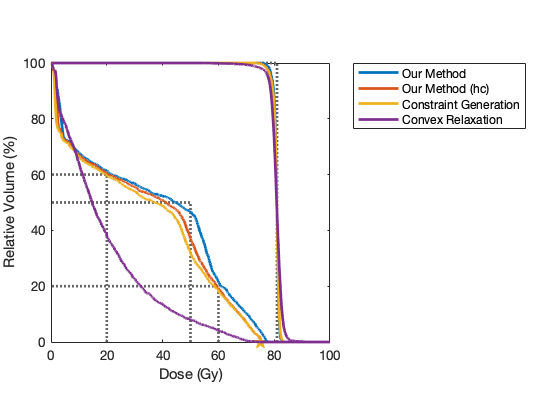

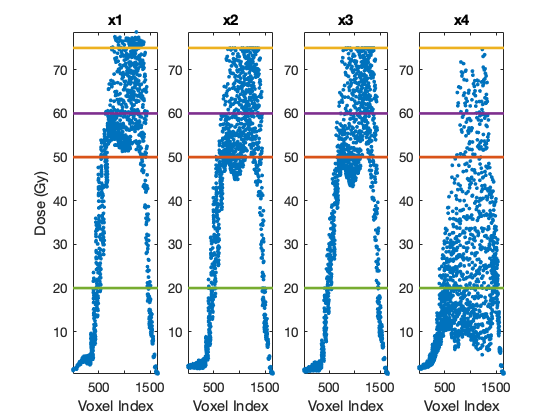

In [64]:
f4.compareVoxelDose(2,[x4a,x4b,x4c,x4d])
f4.compareDVH([x4a,x4b,x4c,x4d],{'Our Method','Our Method (hc)','Constraint Generation','Convex Relaxation'})

# Example 4.3

### Timing
* Our Method: 99.05 seconds
* Our Method (hc): 39.00 seconds
* Constraint Generation: 40.50 seconds
* Convex Relaxation: 466.17 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 67.55 | 80.55 | 80.93 | 77.14 | 85.86 | 1.88 | 159.01
Our Method | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | 164.61
Our Method (hc) | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Constraint Generation | 66.66 | 80.51 | 80.92 | 76.66 | 85.67 | 1.96 | 165.85
Convex Relaxation | 39.71 | 79.82 | 80.71 | 70.35 | 92.42 | 5.01 | 423.70

* Uniform dose of 60 Gy to lymph nodes

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 52.86 | 60.26 | 59.97 | 58.57 | 75.17 | 1.87 | 172.34
Our Method | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30
Our Method (hc) | 48.73 | 60.15 | 59.97 | 57.46 | 75.35 | 2.19 | 200.20
Constraint Generation | 41.50 | 59.96 | 59.91 | 55.89 | 75.58 | 2.68 | 244.46
Convex Relaxation | 43.07 | 60.08 | 59.97 | 55.47 | 77.46 | 3.04 | 277.46

### OAR
* No more than 50% of the rectum volume may exceed 50 Gy
* No more than 30% of the bladder volume may exceed 30 Gy

Method | % R > 50 | R Area | % B > 30 | B Area
-|-|-|-|-
Initialization | 82.04 | 5671.84 | 92.21 | 4780.08
Our Method | 57.04 | 5164.85 | 35.76 | 3304.69
Our Method (hc) | 50.00 | 5097.80 | 29.99 | 3007.40
Constraint Generation | 43.26 | 4934.76 | 28.29 | 2816.25
Convex Relaxation | 31.74 | 4410.61 | 22.01 | 2250.19

## Initialization

In [54]:
% Problem parameters
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};

% Create problem instance
f5 = FluenceMapOpt(structs,'tol',5e-5);
printStats(f5,f5.x0);

Structure: PTV_68
* unif | 67.55 | 80.55 | 80.93 | 77.14 | 85.86 | 1.88 | 159.01
Structure: Rectum
* udvc | 82.04 | 5671.84
Structure: Bladder
* udvc | 92.21 | 4780.08
Structure: PTV_56
* unif | 52.86 | 60.26 | 59.97 | 58.57 | 75.17 | 1.87 | 172.34


## Our Method

In [55]:
tic;
f5.calcBeamlets(false); 
t = toc;
x5a = f5.x;
fprintf('Time: %.2f\n',t)
printStats(f5,x5a)

Time: 99.05
Structure: PTV_68
* unif | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | 164.61
Structure: Rectum
* udvc | 57.04 | 5164.85
Structure: Bladder
* udvc | 35.76 | 3304.69
Structure: PTV_56
* unif | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30


## Our Method (hard constraints)

In [56]:
tic;
f5.constGen(x5a);
t = toc;
x5b = f5.x;
fprintf('Time: %.2f\n',t)
printStats(f5,x5b)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 39.00
Structure: PTV_68
* unif | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Structure: Rectum
* udvc | 50.00 | 5097.80
Structure: Bladder
* udvc | 29.99 | 3007.40
Structure: PTV_56
* unif | 48.73 | 60.15 | 59.97 | 57.46 | 75.35 | 2.19 | 200.20


## Constraint Generation

In [57]:
tic;
f5.constGen();
t = toc;
x5c = f5.x;
fprintf('Time: %.2f\n',t)
printStats(f5,x5c)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 40.50
Structure: PTV_68
* unif | 66.66 | 80.51 | 80.92 | 76.66 | 85.67 | 1.96 | 165.85
Structure: Rectum
* udvc | 43.26 | 4934.76
Structure: Bladder
* udvc | 28.29 | 2816.25
Structure: PTV_56
* unif | 41.50 | 59.96 | 59.91 | 55.89 | 75.58 | 2.68 | 244.46


## Convex Relaxation

In [58]:
tic;
f5.convRelax();
t = toc;
x5d = f5.x;
fprintf('Time: %.2f\n',t)
printStats(f5,x5d)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 466.17
Structure: PTV_68
* unif | 39.71 | 79.82 | 80.71 | 70.35 | 92.42 | 5.01 | 423.70
Structure: Rectum
* udvc | 31.74 | 4410.61
Structure: Bladder
* udvc | 22.01 | 2250.19
Structure: PTV_56
* unif | 43.07 | 60.08 | 59.97 | 55.47 | 77.46 | 3.04 | 277.46


## Results

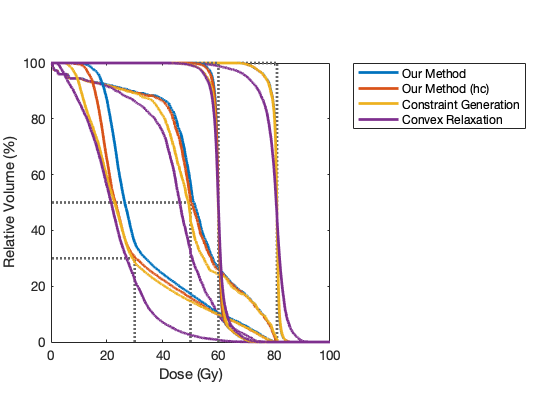

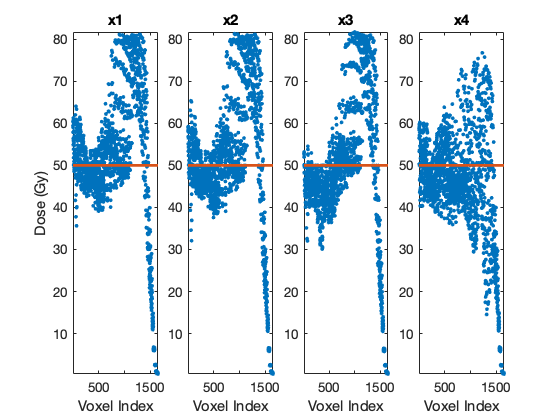

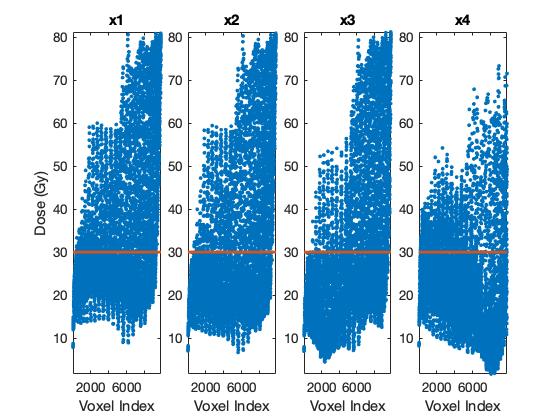

In [63]:
f5.compareVoxelDose(3,[x5a,x5b,x5c,x5d])
f5.compareVoxelDose(2,[x5a,x5b,x5c,x5d])
f5.compareDVH([x5a,x5b,x5c,x5d],{'Our Method','Our Method (hc)','Constraint Generation','Convex Relaxation'})